# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Obtain parcel-level land use

---

This notebook describes _Step 1: Obtain_ of OSEMN methodology, the process of obtaining parcel-level land use info.

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.

## Import dependencies

In [19]:
import pandas as pd
import geopandas as gpd
import os
from time import time

In [20]:
data_path = '../../data/'
gta_lu_path = data_path + 'teranet/ParcelLandUse/GTA/'
os.listdir(gta_lu_path)

['GTA_land_use_code.txt',
 'GTAparcel16LU12.shx',
 'with_epoi',
 'GTAparcel16LU12.prj',
 'GTAparcel16LU12.cpg',
 'GTAparcel16LU12.shp',
 'GTAparcel16LU12.dbf']

In [21]:
ham_lu_path = data_path + 'teranet/ParcelLandUse/Halmilton/'
os.listdir(ham_lu_path)

['Hparcel16LU10.prj',
 'Halmilton_Land_Use_Codes_2009_Original.pdf',
 'with_epoi',
 'HalLanduse_converted.csv',
 'Hparcel16LU10.cpg',
 'Hparcel16LU10.shp',
 'Hparcel16LU10.dbf',
 'Hparcel16LU10.shx']

## Load geometry of land use

----- GeoDataFrame loaded
in 121.58 seconds (2.03 minutes)
with 1,490,138 rows
and 13 columns
-- Column names:
 Index(['FID_1', 'PIN', 'SHAPE_Leng', 'SHAPE_Area', 'FID_2', 'OBJECTID',
       'PIN_1', 'municipali', 'LANDUSE', 'LengthM', 'AreaM2', 'Distance',
       'geometry'],
      dtype='object')


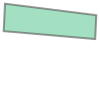

In [4]:
t = time()
lu_gta_gdf = gpd.read_file(gta_lu_path + 'GTAparcel16LU12.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gta_gdf.shape[0], lu_gta_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_gta_gdf.columns)

lu_gta_gdf.iloc[0].geometry

In [ ]:
t = time()
lu_gta_gdf = gpd.read_file(gta_lu_path + 'GTAparcel16LU12.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gta_gdf.shape[0], lu_gta_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_gta_gdf.columns)

lu_gta_gdf.iloc[0].geometry

----- GeoDataFrame loaded
in 14.52 seconds (0.24 minutes)
with 174,729 rows
and 13 columns
-- Column names:
 Index(['FID_1', 'PIN', 'SHAPE_Area', 'OBJECTID', 'FRONTAGE', 'DEPTH',
       'PROP_CODE', 'SITE_AREA', 'PIN_1', 'ID', 'SHAPE_Leng', 'Shape_Ar_1',
       'geometry'],
      dtype='object')


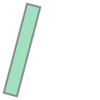

In [22]:
t = time()
lu_ham_gdf = gpd.read_file(ham_lu_path + 'Hparcel16LU10.shp')
elapsed = time() - t

lu_ham_gdf = lu_ham_gdf.rename(columns={'Shape_Le_1': 'SHAPE_Leng'})

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_ham_gdf.shape[0], lu_ham_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_ham_gdf.columns)

# lu_gta_gdf.plot(); # plotting the whole GeoDataFrame can take a very long time
lu_ham_gdf.iloc[0].geometry

## Overlap of PINs between GTA and Hamilton parcels
5 PINs seem to overlap between Hamilton and GTA parcel data. As representations in the GTA dataset have more meaningful attributes, records from the GTA dataset are kept for these 5 PINs.

### Overlap of PINs

In [6]:
mask1 = lu_gta_gdf['PIN'].isin(lu_ham_gdf['PIN'])
lu_gta_gdf[mask1].sort_values('PIN')

,FID_1,PIN,SHAPE_Leng,SHAPE_Area,FID_2,OBJECTID,PIN_1,municipali,LANDUSE,LengthM,AreaM2,Distance,geometry
1128722,1128494,070930070,138.191399,426.820430,654673,654674,070930070,BURLINGTON/E FLAM TWP,99,138.191438,426.820531,0.0,"POLYGON ((1338112.754821777 5449281.164001465,..."
1128720,1128491,070930081,128.127024,749.493468,634153,634154,070930081,None,1,128.127049,749.495349,0.0,"POLYGON ((1338423.250793457 5449556.442382812,..."
1128721,1128492,071160056,242.240206,865.353065,646365,646366,071160056,BURLINGTON,99,242.240206,865.355662,0.0,"POLYGON ((1337357.395996094 5448840.98840332, ..."
1128724,1128495,071930041,998.378425,5401.586550,669853,669854,071930041,BURLINGTON,28,998.219747,5375.520422,0.0,"POLYGON ((1334283.849182129 5451861.067993164,..."
1128723,1128493,071940013,337.248937,6177.316376,659970,659971,071940013,BURLINGTON/E FLAM TWP,1,337.249027,6177.321385,0.0,"POLYGON ((1334936.773193359 5451894.122436523,..."


In [7]:
mask1 = lu_ham_gdf['PIN'].isin(lu_gta_gdf['PIN'])
lu_ham_gdf[mask1].sort_values('PIN')

,FID_1,PIN,SHAPE_Area,OBJECTID,FRONTAGE,DEPTH,PROP_CODE,SITE_AREA,PIN_1,ID,SHAPE_Leng,Shape_Ar_1,geometry
6031,79,070930070,426.820430,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,"POLYGON ((1338112.754821777 5449281.164001465,..."
6029,76,070930081,749.493468,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,"POLYGON ((1338423.250793457 5449556.442382812,..."
6030,77,071160056,865.353065,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,"POLYGON ((1337357.395996094 5448840.98840332, ..."
148187,148175,071930041,5401.586550,288883,0.0,0.0,0.0,0.0,71930041.0,3652.0,998.378500,5401.589054,"POLYGON ((1334283.849182129 5451861.067993164,..."
507,78,071940013,6177.316376,288853,0.0,0.0,0.0,0.0,71940013.0,3662.0,337.248951,6177.317169,"POLYGON ((1334936.773193359 5451894.122436523,..."


### Remove these PINs from Hamilton dataset

In [8]:
mask1 = lu_ham_gdf['PIN'].isin(lu_gta_gdf['PIN'])
old_len = len(lu_ham_gdf)
lu_ham_gdf = lu_ham_gdf[~mask1]
print("{0:,} rows have been removed. {1:,} records remaining.".format(old_len - len(lu_ham_gdf), len(lu_ham_gdf)))

5 rows have been removed. 174,724 records remaining.


## Drop column `Shape_Ar_1` from Hamilton GeoDataFrame
Column `Shape_Ar_1` in Hamilton GeoDataFrame has values that are close to values found in column `SHAPE_Area`, so `Shape_Ar_1` is removed to avoid redundancy.

In [9]:
lu_ham_gdf = lu_ham_gdf.drop('Shape_Ar_1', axis=1)
print("Column dropped.")
lu_ham_gdf.columns

Column dropped.


Index(['FID_1', 'PIN', 'SHAPE_Area', 'OBJECTID', 'FRONTAGE', 'DEPTH',
       'PROP_CODE', 'SITE_AREA', 'PIN_1', 'ID', 'SHAPE_Leng', 'geometry'],
      dtype='object')

## Concatenate GTA and Hamilton GeoDataFrames

#### Validate CRS

In [10]:
lu_gta_gdf.crs

{'init': 'epsg:5320'}

In [11]:
lu_ham_gdf.crs

{'init': 'epsg:5320'}

#### Create a new GeoDataFrame from concatenated GTA and Hamilton GeoDataFrames

In [12]:
lu_df = pd.concat([lu_gta_gdf, lu_ham_gdf])
print("DataFrames concatenated!\n--- {0:,} + {1:,} = {2:,} rows"
      .format(len(lu_gta_gdf), len(lu_ham_gdf), len(lu_df)) + 
      "\n--- {0:,} + {1:,} = {2:,} columns (only not overlapping columns are added)"
      .format(len(lu_gta_gdf.columns), len(lu_ham_gdf.columns), len(lu_df.columns)))

lu_gdf = gpd.GeoDataFrame(lu_df, geometry=lu_df['geometry'])
lu_gdf.crs = lu_gta_gdf.crs
print("\n\n----- GeoDataFrame created"
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gdf.shape[0], lu_gdf.shape[1]) + 
      "\n\n-- Column names:\n", lu_gdf.columns, 
      "\n\n --- CRS:", lu_gdf.crs)

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


DataFrames concatenated!
--- 1,490,138 + 174,724 = 1,664,862 rows
--- 13 + 12 = 18 columns (only not overlapping columns are added)


----- GeoDataFrame created
with 1,664,862 rows
and 18 columns

-- Column names:
 Index(['AreaM2', 'DEPTH', 'Distance', 'FID_1', 'FID_2', 'FRONTAGE', 'ID',
       'LANDUSE', 'LengthM', 'OBJECTID', 'PIN', 'PIN_1', 'PROP_CODE',
       'SHAPE_Area', 'SHAPE_Leng', 'SITE_AREA', 'geometry', 'municipali'],
      dtype='object') 

 --- CRS: {'init': 'epsg:5320'}


#### Validate that projections match with original GeoDataFrame
The two plots completely overlap.

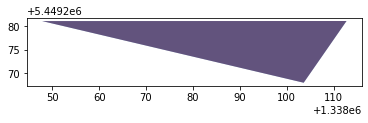

In [13]:
%matplotlib inline
pin = '070930070'
mask1 = lu_gdf['PIN'] == pin
ax = lu_gdf.loc[mask1, 'geometry'].plot()
mask2 = lu_gta_gdf['PIN'] == pin
lu_gta_gdf.loc[mask2, 'geometry'].plot(ax=ax, color='red', alpha=0.3);

#### Change CRS to EPSG:4326

In [14]:
t = time()
lu_gdf = lu_gdf.to_crs(epsg=4326)
elapsed = time() - t
print("New CRS:\n", lu_gdf.crs, "\n\ntook {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

New CRS:
 {'init': 'epsg:4326', 'no_defs': True} 

took 244.66 seconds (4.08 minutes)


## Save results to a .csv file

In [15]:
save_path = data_path + 'teranet/ParcelLandUse/'
os.listdir(save_path)

['lu_info_gta.csv', 'GTA', 'lu_info_ham.csv', 'Halmilton', 'lu_gtha_shapefile']

In [16]:
t = time()
lu_gdf.drop('geometry', axis=1).to_csv(save_path + 'lu_gtha.csv', index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

DataFrame saved to file:
 ../../data/teranet/ParcelLandUse/ 
took 32.70 seconds (0.54 minutes)


## Save results to a new shapefile

In [18]:
t = time()
lu_gdf.to_file(save_path + '/lu_gtha_shapefile/lu_gtha.shp', index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

DataFrame saved to file:
 ../../data/teranet/ParcelLandUse/ 
took 1656.13 seconds (27.60 minutes)
